<a href="https://colab.research.google.com/github/Sam74012/Climate_impact_on_crop_production/blob/main/Climate_impact_on_crop_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import gdown

In [ ]:
url = "https://drive.google.com/uc?id=1pR-cl3DTQTUaU_L25wlHXWxUqIDq75rB"
gdown.download(url, output='dataset.csv')
df=pd.read_csv("dataset.csv")
df

Downloading...
From: https://drive.google.com/uc?id=1pR-cl3DTQTUaU_L25wlHXWxUqIDq75rB
To: /content/dataset.csv
100%|██████████| 2.24M/2.24M [00:00<00:00, 127MB/s]


,State,Year,Crop,Area,Production,AnnualRainfall,AvgTemperature
0,Odisha,2015,Soybean,152738,334366,911,21.2
1,Odisha,2015,Barley,143836,373696,420,17.6
2,Odisha,2009,Wheat,73164,226020,648,15.6
3,Kerala,2015,Potato,250124,918684,362,20.1
4,Odisha,2016,Coconut,67027,305775,2700,28.8
...,...,...,...,...,...,...,...
49995,Karnataka,2004,Maize,285784,678008,669,21.1
49996,Haryana,2011,Soybean,120861,236314,644,20.4
49997,Haryana,2023,Groundnut,129558,313840,983,28.3
49998,Odisha,2020,Jute,276095,600111,1808,24.6


In [ ]:
df.shape

(50000, 7)

In [ ]:
le=LabelEncoder()
df["State"]=le.fit_transform(df["State"])
df["State"]

,State
0,9
1,9
2,9
3,6
4,9
...,...
49995,5
49996,4
49997,4
49998,9


In [ ]:
df["Crop"]=le.fit_transform(df["Crop"])
df["Crop"]

,Crop
0,11
1,1
2,14
3,8
4,2
...,...
49995,7
49996,11
49997,4
49998,6


In [ ]:
df

,State,Year,Crop,Area,Production,AnnualRainfall,AvgTemperature
0,9,2015,11,152738,334366,911,21.2
1,9,2015,1,143836,373696,420,17.6
2,9,2009,14,73164,226020,648,15.6
3,6,2015,8,250124,918684,362,20.1
4,9,2016,2,67027,305775,2700,28.8
...,...,...,...,...,...,...,...
49995,5,2004,7,285784,678008,669,21.1
49996,4,2011,11,120861,236314,644,20.4
49997,4,2023,4,129558,313840,983,28.3
49998,9,2020,6,276095,600111,1808,24.6


In [ ]:
X=df[["State","Year", "Crop", "Area", "AnnualRainfall", "AvgTemperature"]]
X

,State,Year,Crop,Area,AnnualRainfall,AvgTemperature
0,9,2015,11,152738,911,21.2
1,9,2015,1,143836,420,17.6
2,9,2009,14,73164,648,15.6
3,6,2015,8,250124,362,20.1
4,9,2016,2,67027,2700,28.8
...,...,...,...,...,...,...
49995,5,2004,7,285784,669,21.1
49996,4,2011,11,120861,644,20.4
49997,4,2023,4,129558,983,28.3
49998,9,2020,6,276095,1808,24.6


In [ ]:
y=df["Production"]
y

,Production
0,334366
1,373696
2,226020
3,918684
4,305775
...,...
49995,678008
49996,236314
49997,313840
49998,600111


In [ ]:
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 4.70812115e-01,  5.03106433e-01,  9.30172083e-01,
        -3.13230100e-01, -1.44021170e-01, -7.51033340e-01],
       [ 4.70812115e-01,  5.03106433e-01, -1.38543993e+00,
        -4.37091588e-01, -9.32882293e-01, -1.54517955e+00],
       [ 4.70812115e-01, -3.61476260e-01,  1.62485569e+00,
        -1.42041434e+00, -5.66567963e-01, -1.98637190e+00],
       ...,
       [-6.87089635e-01,  1.65588336e+00, -6.90756326e-01,
        -6.35754174e-01, -2.83429608e-02,  8.15199472e-01],
       [ 4.70812115e-01,  1.22359201e+00, -2.27633923e-01,
         1.40314618e+00,  1.29713652e+00, -1.00635973e-03],
       [ 1.39713351e+00,  7.08150865e-02,  3.92727797e-03,
         1.69288912e+00, -5.40861694e-01,  4.18126365e-01]])

In [ ]:
X.shape

(50000, 6)

In [ ]:
X[:10]

array([[ 0.47081211,  0.50310643,  0.93017208, -0.3132301 , -0.14402117,
        -0.75103334],
       [ 0.47081211,  0.50310643, -1.38543993, -0.43709159, -0.93288229,
        -1.54517955],
       [ 0.47081211, -0.36147626,  1.62485569, -1.42041434, -0.56656796,
        -1.9863719 ],
       [-0.22392894,  0.50310643,  0.23548848,  1.04178843, -1.02606752,
        -0.99368913],
       [ 0.47081211,  0.64720355, -1.15387873, -1.50580391,  2.73026101,
         0.92549756],
       [ 0.00765141,  0.2149122 , -1.61700113,  0.47899922, -1.03410073,
         0.4622456 ],
       [ 1.39713351,  1.65588336,  0.00392728, -1.46538405, -0.75454505,
         0.3298879 ],
       [ 1.16555316,  0.50310643,  1.16173328, -1.31187205,  0.26085256,
         0.79313985],
       [-1.38183068,  1.36768913, -0.22763392,  0.37408846,  0.34761122,
         0.81519947],
       [ 1.62871386, -1.37015607,  0.46704968,  0.35657087, -0.62119378,
        -1.05986798]])

In [ ]:
y

,Production
0,334366
1,373696
2,226020
3,918684
4,305775
...,...
49995,678008
49996,236314
49997,313840
49998,600111


In [ ]:
y=sc.fit_transform(y.to_frame())
y

array([[-0.417755  ],
       [-0.30485919],
       [-0.72875956],
       ...,
       [-0.47667438],
       [ 0.34505957],
       [ 0.56535423]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=torch.tensor(X_train, dtype=torch.float)
X_test=torch.tensor(X_test, dtype=torch.float)
y_train=torch.tensor(y_train, dtype=torch.float)
y_test=torch.tensor(y_test, dtype=torch.float)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40000, 6]),
 torch.Size([40000, 1]),
 torch.Size([10000, 6]),
 torch.Size([10000, 1]))

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Model 0
class CropProductionModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_shape,
                  out_features=64),
        nn.Linear(in_features=64,
                  out_features=32),
        nn.Linear(in_features=32,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [ ]:
model_0=CropProductionModelV0(input_shape=6,
                              output_shape=1).to(device)
model_0

CropProductionModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(params=model_0.parameters(),
                           lr=0.001)

In [ ]:
rand_tensor=torch.randn(size=(30,6))
rand_tensor.shape
ra=model_0(rand_tensor)
ra.shape

torch.Size([30, 1])

In [ ]:
# Training loop function
def train_step(model: torch.nn.Module,
               X_train: torch.Tensor,
               y_train: torch.Tensor,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               epoch: int,
               device: torch.device):
  X_train, y_train = X_train.to(device), y_train.to(device)
  model.train()
  y_pred=model(X_train)
  loss=loss_fn(y_pred, y_train)
  rmse=torch.sqrt(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%100==0:
    print(f"Epoch: {epoch} | Train RMSE: {rmse:.4f}")

In [ ]:
# Testing loop function
def test_step(model: torch.nn.Module,
              X_test: torch.Tensor,
              y_test: torch.Tensor,
              loss_fn: torch.nn.Module,
              epoch: int,
              device: torch.device):
  X_test, y_test = X_test.to(device), y_test.to(device)
  model.eval()
  with torch.inference_mode():
    test_pred=model(X_test)
    loss=loss_fn(test_pred, y_test)
    rmse=torch.sqrt(loss)
    if epoch%100==0:
      print(f"Epoch: {epoch} | Test RMSE: {rmse:.4f}")

In [ ]:
## Training and testing model 0
from tqdm.auto import tqdm

EPOCHS=300

for epoch in tqdm(range(EPOCHS)):
  train_step(model=model_0,
             X_train=X_train,
             y_train=y_train,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epoch=epoch,
             device=device)
  test_step(model=model_0,
            X_test=X_test,
            y_test=y_test,
            loss_fn=loss_fn,
            epoch=epoch,
            device=device)

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch: 0 | Train RMSE: 1.0401
Epoch: 0 | Test RMSE: 0.9937
Epoch: 100 | Train RMSE: 0.7908
Epoch: 100 | Test RMSE: 0.7789
Epoch: 200 | Train RMSE: 0.7908
Epoch: 200 | Test RMSE: 0.7789


In [ ]:
import matplotlib.pyplot as plt

def plot_predictions_1(test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     model: torch.nn.Module,
                     device: torch.device):
  test_data, test_labels = test_data.to(device), test_labels.to(device)
  model.eval()
  with torch.inference_mode():
    predictions=model(test_data)

  test_labels, predictions= test_labels.to("cpu").numpy(), predictions.to("cpu").numpy()
  plt.plot(test_labels[:200], label="Actual", marker="o")
  plt.plot(predictions[:200], label="Predicted", marker="x")
  plt.xlabel("Sample Index")
  plt.xlabel("Crop Production")
  plt.title("Actual vs Predicted Crop Production")
  plt.legend()
  plt.grid(True)

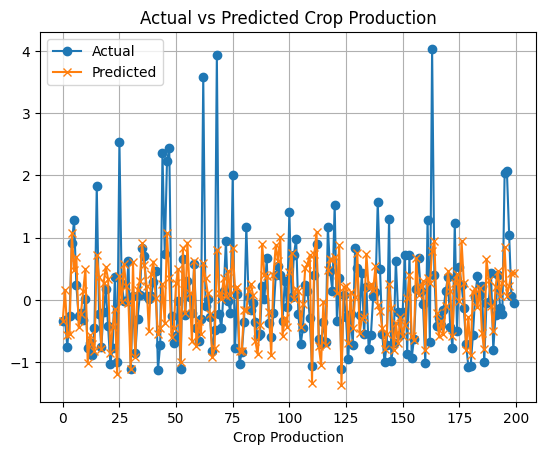

In [ ]:
plot_predictions_1(test_data=X_test,
                 test_labels=y_test,
                 model=model_0,
                 device=device)

In [ ]:
def plot_predictions_2(test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     model: torch.nn.Module,
                     device: torch.device):
  test_data, test_labels = test_data.to(device), test_labels.to(device)
  model.eval()
  with torch.inference_mode():
    predictions=model(test_data)

  test_labels, predictions= test_labels.to("cpu").numpy(), predictions.to("cpu").numpy()
  plt.figure(figsize=(6,6))
  plt.scatter(test_labels, predictions, alpha=0.7)
  plt.xlabel("Actual Production")
  plt.ylabel("Predicted Production")
  plt.title("Actual vs Predicted Crop Production")
  plt.plot([min(test_labels),max(test_labels)], [min(test_labels),max(test_labels)], "r--")
  plt.grid(True)

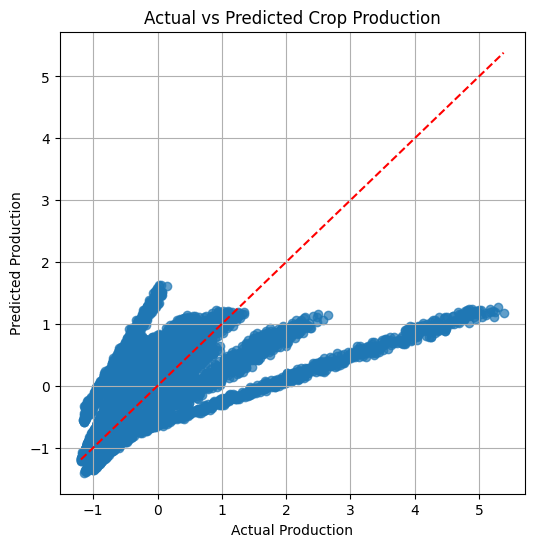

In [ ]:
plot_predictions_2(test_data=X_test,
                 test_labels=y_test,
                 model=model_0,
                 device=device)

In [ ]:
# Model 1
class CropProductionModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Linear(in_features=input_shape,
                  out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64,
                  out_features=32),
        nn.ReLU(),
        nn.Linear(in_features=32,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
model_1=CropProductionModelV1(input_shape=6,
                              output_shape=1).to(device)
model_1

CropProductionModelV1(
  (layer_stack): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(params=model_1.parameters(),
                           lr=0.001)

In [ ]:
## Training and testing model 1
from tqdm.auto import tqdm

EPOCHS=7000

for epoch in tqdm(range(EPOCHS)):
  train_step(model=model_1,
             X_train=X_train,
             y_train=y_train,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epoch=epoch,
             device=device)
  test_step(model=model_1,
            X_test=X_test,
            y_test=y_test,
            loss_fn=loss_fn,
            epoch=epoch,
            device=device)

  0%|          | 0/7000 [00:00<?, ?it/s]

Epoch: 0 | Train RMSE: 0.9981
Epoch: 0 | Test RMSE: 0.9740
Epoch: 100 | Train RMSE: 0.6727
Epoch: 100 | Test RMSE: 0.6682
Epoch: 200 | Train RMSE: 0.5104
Epoch: 200 | Test RMSE: 0.5005
Epoch: 300 | Train RMSE: 0.3608
Epoch: 300 | Test RMSE: 0.3567
Epoch: 400 | Train RMSE: 0.2984
Epoch: 400 | Test RMSE: 0.2959
Epoch: 500 | Train RMSE: 0.2548
Epoch: 500 | Test RMSE: 0.2532
Epoch: 600 | Train RMSE: 0.2217
Epoch: 600 | Test RMSE: 0.2208
Epoch: 700 | Train RMSE: 0.1976
Epoch: 700 | Test RMSE: 0.1973
Epoch: 800 | Train RMSE: 0.1784
Epoch: 800 | Test RMSE: 0.1788
Epoch: 900 | Train RMSE: 0.1628
Epoch: 900 | Test RMSE: 0.1634
Epoch: 1000 | Train RMSE: 0.1504
Epoch: 1000 | Test RMSE: 0.1503
Epoch: 1100 | Train RMSE: 0.1401
Epoch: 1100 | Test RMSE: 0.1393
Epoch: 1200 | Train RMSE: 0.1322
Epoch: 1200 | Test RMSE: 0.1312
Epoch: 1300 | Train RMSE: 0.1261
Epoch: 1300 | Test RMSE: 0.1246
Epoch: 1400 | Train RMSE: 0.1212
Epoch: 1400 | Test RMSE: 0.1197
Epoch: 1500 | Train RMSE: 0.1175
Epoch: 1500 | Te

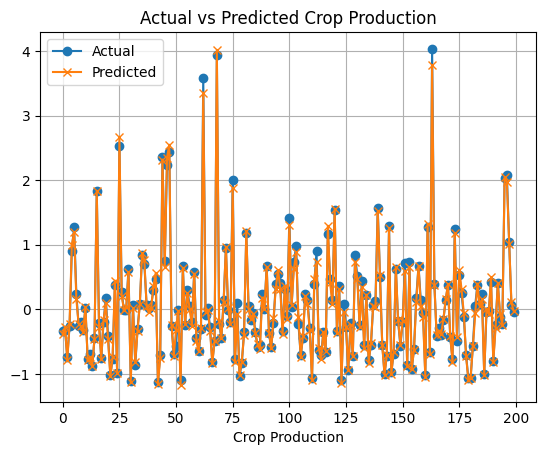

In [ ]:
plot_predictions_1(test_data=X_test,
                 test_labels=y_test,
                 model=model_1,
                 device=device)

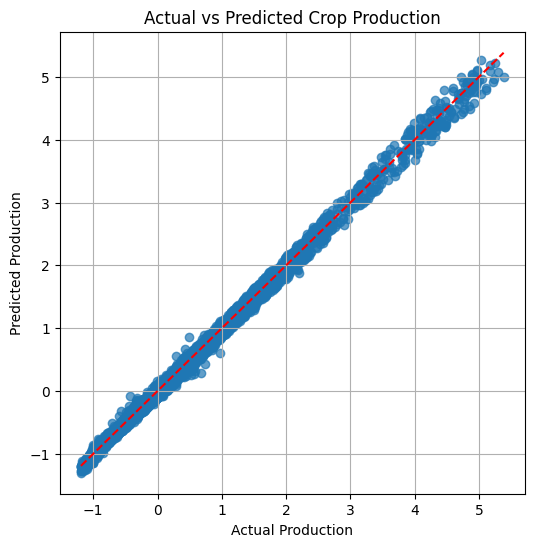

In [ ]:
plot_predictions_2(test_data=X_test,
                 test_labels=y_test,
                 model=model_1,
                 device=device)